In [3]:
# Loading the packages I will need:

print("Loading packages...", end = '')

import numpy as np
from pyunpack import Archive 
import pandas as pd 
import missingno as msno
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import shutil  # For handling directories


print("Successful.") 

Loading packages...Successful.


### Data Preprocessing

Load CSV files


In [32]:
# Path to the data folder
data_folder = "data"

# Initialize a list to store DataFrames
dataframes = []

# Traverse through the year and month folders to find CSV files
for year_folder in os.listdir(data_folder):
    year_path = os.path.join(data_folder, year_folder)
    if os.path.isdir(year_path):
        for month_folder in os.listdir(year_path):
            month_path = os.path.join(year_path, month_folder)
            if os.path.isdir(month_path):
                for file in os.listdir(month_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(month_path, file)
                        df = pd.read_csv(file_path)
                        dataframes.append(df)

# Check if any CSV files were loaded
if not dataframes:
    print("No CSV files found in the data folder.")
else:
    # Display the list of CSV files loaded
    print(f"Loaded {len(dataframes)} CSV files.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_2172\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2172\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2172\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2172\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2172\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Us

Loaded 161 CSV files.


C:\Users\DELL\AppData\Local\Temp\ipykernel_2172\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Combine the Dataframes

In [33]:
# Check if any DataFrames were loaded
if not dataframes:
    print("No DataFrames to concatenate.")
else:
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Display the combined DataFrame information
    combined_df.info()

    # Display the first few rows of the combined DataFrame to inspect
    print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            int64  
 13  YEAR             int64  
 14  COMMODITY2       float64
dtypes: float64(2), int64(8), object(5)
memory usage: 745.8+ MB
   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       

In [34]:
combined_df.tail()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
6517220,2,NaN,55XX,5,NaN,NaN,1220,4384342,7399,1883,NaN,0,9,2024,98.0
6517221,2,NaN,55XX,8,NaN,NaN,1220,50211,6350,3500,NaN,0,9,2024,98.0
6517222,2,NaN,60XX,8,NaN,NaN,1220,793390,80,500,NaN,0,9,2024,89.0
6517223,2,NaN,70XX,8,NaN,NaN,1220,233990301,0,0,NaN,0,9,2024,99.0
6517224,2,NaN,70XX,8,NaN,NaN,2010,224981722,0,0,NaN,0,9,2024,99.0


In [35]:
combined_df.head(7)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,0115,5,NaN,XB,1220,4660,0,67,2.0,X,4,2020,NaN
1,1,AK,0901,5,NaN,XO,1220,14360,0,282,1.0,X,4,2020,NaN
2,1,AK,20XX,1,XX,NaN,2010,4293733,24971000,0,1.0,0,4,2020,NaN
3,1,AK,20XX,3,NaN,XA,1220,28283,443,563,1.0,X,4,2020,NaN
4,1,AK,20XX,3,NaN,XA,1220,29848,69,538,2.0,X,4,2020,NaN
5,1,AK,20XX,3,NaN,XC,1220,6699,248,142,1.0,X,4,2020,NaN
6,1,AK,20XX,3,NaN,XC,1220,9103,15,208,2.0,X,4,2020,NaN


In [36]:
# Check for missing values
print("Missing values in each column:")
print(combined_df.isnull().sum())


Missing values in each column:
TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2184568
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2         1500485
dtype: int64


want to check unique values in each column just to be on the safe side

In [37]:
# Check unique values for each column
for column in combined_df.columns:
    unique_values = combined_df[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print("\n")

Unique values in column TRDTYPE:
[1 2]


Unique values in column USASTATE:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in column DEPE:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '3011' '3020' '3318' '4115'

we can now crosscheck from the data dictionary and make comparisons on the unique vales

COMMODITY2 change from float to int 

(CONTCODE) Code Containerized? 
X Containerized 
0 Non-Containerized 


DF from float to int

Country Code (COUNTRY) int to obj
Code Country 
1220 Canada 
2010 Mexico

Domestic/Foreign Code (DF) float to object 
Distinguishes whether the merchandise was produced in the U.S. 
Code 
1 domestically produced merchandise 
2 foreign produced merchandise

Mode of Transportation Code (DISAGMOT) int to object 
Code Description 
1 Vessel 
3 Air 
4 Mail (U.S. Postal Service) 
5 Truck 
6 Rail 
7 Pipeline 
8 Other 
9 Foreign Trade Zones (FTZs)

Month (MONTH) int to datetime 
Month Code 
Month 
1 January 
2 February 
3 March 
4 April 
5 May 
6 June 
7 July 
8 August 
9 September 
10 October 
11 November 
12 December

DEPE no need

Shipping Weight (SHIPWT) no need Weight in Kilograms

Trade Type Code (TRDTYPE) int to obj 
Code Trade Type 
1 Export 
2 Import

USASTATE no need

Value (VALUE) Value of Goods in United States Dollars

Year (YEAR) int to datetime

Freight Charges (FREIGHT_CHARGES) no need Freight Charges in U.S. Dollars


datatypes changed and unique values assigned to specific values according to data dictionary pdf 

In [38]:
# Fill non-finite values in COMMODITY2 with 0 and change from float to int
combined_df['COMMODITY2'] = combined_df['COMMODITY2'].fillna(0).astype(int)

# Change CONTCODE from code to descriptive text
combined_df['CONTCODE'] = combined_df['CONTCODE'].replace({
    'X': 'Containerized',
    '0': 'Non-Containerized'
}) 

# Change COUNTRY from int to object and replace values
combined_df['COUNTRY'] = combined_df['COUNTRY'].astype(str).replace({
    '1220': 'Canada',
    '2010': 'Mexico'
})

# Change DF from float to object and replace values
combined_df['DF'] = combined_df['DF'].astype(str).replace({
    '1.0': 'domestic pr. merch',
    '2.0': 'foreign pr. merch'
})

# Change DISAGMOT from int to object and replace values
combined_df['DISAGMOT'] = combined_df['DISAGMOT'].astype(str).replace({
    '1': 'Vessel',
    '3': 'Air',
    '4': 'Mail (U.S. Postal Service)',
    '5': 'Truck',
    '6': 'Rail',
    '7': 'Pipeline',
    '8': 'Other',
    '9': 'Foreign Trade Zones (FTZs)'
})

# Change MONTH from int to descriptive text
combined_df['MONTH'] = combined_df['MONTH'].astype(str).replace({
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
})

# Change TRDTYPE from int to object and replace values
combined_df['TRDTYPE'] = combined_df['TRDTYPE'].astype(str).replace({
    '1': 'Export',
    '2': 'Import'
})

# Ensure YEAR column is in datetime format and extract the year as string
combined_df['YEAR'] = pd.to_datetime(combined_df['YEAR'], errors='coerce', format='%Y')
combined_df['YEAR'] = combined_df['YEAR'].dt.year.astype(str)

# Assign the updated DataFrame to a new variable df
df = combined_df


In [39]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '

In [40]:
# Display the updated DataFrame information
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
 14  COMMODITY2       int64 
dtypes: int64(4), object(11)
memory usage: 745.8+ MB


In [41]:
df.describe()

,VALUE,SHIPWT,FREIGHT_CHARGES,COMMODITY2
count,6.517225e+06,6.517225e+06,6.517225e+06,6.517225e+06
mean,2.945795e+06,1.200403e+06,3.851583e+04,4.375757e+01
std,3.786455e+07,4.073193e+07,1.024961e+06,3.417434e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434300e+04,0.000000e+00,0.000000e+00,6.000000e+00
50%,7.220900e+04,0.000000e+00,2.630000e+02,4.000000e+01
75%,4.345660e+05,2.391000e+03,2.900000e+03,7.900000e+01
max,5.595625e+09,9.068700e+09,2.487214e+08,9.900000e+01


In [42]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '

### Data Cleaning

In [43]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
dtype: int64


columns with nan values 

USASTATE

DEPE

MEXSTATE

CANPROV

DF

USASTATE            915116

DEPE               4101624

MEXSTATE           4677264

CANPROV            3119497 

Unique values in column CONTCODE:

['Containerized' 'Non-Containerized' '1' 0 1]

i have to check the unique columns in CONTCODE column and either remove anything 

other than 'Containerized' 'Non-Containerized' or rename it

CONTCODE column

In [44]:
# Define the unique values to filter
unique_values = ['Containerized', 'Non-Containerized', '1', 0, 1]

# Filter the DataFrame for rows with the specified unique values in the CONTCODE column
filtered_df = df[df['CONTCODE'].isin(unique_values)]

# Count the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Display the number of rows
print(f"Number of rows with specified unique values in CONTCODE: {num_rows}")

Number of rows with specified unique values in CONTCODE: 6517225


In [45]:
# Count the number of each unique value in the CONTCODE column
contcode_counts = df['CONTCODE'].value_counts()

# Display the counts
print("Counts of each unique value in the CONTCODE column:")
print(contcode_counts)

Counts of each unique value in the CONTCODE column:
CONTCODE
Non-Containerized    3118231
Containerized        2385964
0                     504833
1                     448877
1                      59320
Name: count, dtype: int64


In [46]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '

drop rows with unique values '1' , 1 in the CONTCODE column and assign 0 to Non-Containerized since 0 is the assigned value to Non-Containerized in the data dictionary


In [47]:
# Replace 0 with Non-Containerized in the CONTCODE column
df['CONTCODE'] = df['CONTCODE'].replace(0, 'Non-Containerized')

# Drop rows with the value 1 in the CONTCODE column
df = df[df['CONTCODE'] != '1']
df = df[df['CONTCODE'] != 1]

# Verify the changes by counting the number of each unique value in the CONTCODE column again
contcode_counts_updated = df['CONTCODE'].value_counts()

# Display the updated counts
print("Updated counts of each unique value in the CONTCODE column:")
print(contcode_counts_updated)

Updated counts of each unique value in the CONTCODE column:
CONTCODE
Non-Containerized    3623064
Containerized        2385964
Name: count, dtype: int64


chk/p

In [48]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '

USASTATE column

In [49]:
# Check unique values in the USASTATE column
unique_usastate_values = df['USASTATE'].unique()

# Display the unique values
print("Unique values in the USASTATE column:")
print(unique_usastate_values)

Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


In [50]:
# Count the number of each unique value in the USASTATE column
usastate_counts = df['USASTATE'].value_counts()

# Display the counts
print("Counts of each unique value in the USASTATE column:")
print(usastate_counts)

Counts of each unique value in the USASTATE column:
USASTATE
TX    310355
CA    269118
IL    218062
OH    176404
PA    172986
NY    172743
FL    168339
MI    160781
GA    157111
NJ    156209
WI    149296
NC    147614
IN    137796
MN    133375
TN    131837
MA    126794
WA    125858
AZ    119112
MO    117173
KY    107014
SC    106348
CO     98791
VA     98586
CT     95591
OR     91240
IA     90305
KS     87038
AL     86898
UT     85219
MD     83287
NV     74545
OK     73347
LA     73213
MS     67628
AR     64525
NH     61959
NE     61362
ID     56324
ME     56123
RI     47097
ND     46167
DE     43192
NM     42557
MT     42352
VT     41147
SD     39439
WV     35409
DU     31004
WY     25801
AK     22936
HI     12526
DC      9265
Name: count, dtype: int64


In [51]:
# Count the number of NaN values in the USASTATE column
usastate_nan_count = df['USASTATE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the USASTATE column: {usastate_nan_count}")

Count of NaN values in the USASTATE column: 799830


In [53]:
# Drop rows with NaN values in the USASTATE column
df = df.dropna(subset=['USASTATE'])

# Verify the changes by checking the count of NaN values in the USASTATE column again
usastate_nan_count_after = df['USASTATE'].isnull().sum()

# Display the count of NaN values after dropping to confirm the changes 
print(f"Count of NaN values in the USASTATE column after dropping: {usastate_nan_count_after}")



Count of NaN values in the USASTATE column after dropping: 0


chk/p

In [54]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

DEPE column


In [55]:
# Check unique values in the DEPE column
unique_depe_values = df['DEPE'].unique()

# Display the unique values
print("Unique values in the DEPE column:")
print(unique_depe_values)

# Count the number of each unique value in the DEPE column
depe_counts = df['DEPE'].value_counts()

# Display the counts
print("Counts of each unique value in the DEPE column:")
print(depe_counts)



Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115' '53XX' '0101' '0102' '0110' '0212'
 '13XX' '2302' '2307' '2504' '2505' '25XX' '2602' '2704' '28XX' '3002'
 '3003' '3005' '3007' '3008' '3013' '3025' '32XX' '3304' '3308' '3316'
 '3322' '3405' '3408' '3805' '3809' '3819' '3901' '39XX' '4105' '4110'
 '49XX' '5203' '5501' '3307' '45XX' '0104' '0211' '04XX' '1012' '1704'
 '80XX' '51XX' '0118' '0127' '14XX' '16XX' 

In [56]:
# Count the number of NaN values in the DEPE column
depe_nan_count = df['DEPE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the DEPE column: {depe_nan_count}")

Count of NaN values in the DEPE column: 3843262


 put all port code in their respective district code so we use the district code for analysis because the port codes are too many

 organize the port codes under their respective district codes and create a new column in the DataFrame to represent the district code. This will help simplify the analysis by using the district code instead of individual port codes.

In [57]:
# Create a mapping dictionary for district codes and port codes

# mapping dictionary for district codes and their corresponding port codes
district_mapping = {
    '01XX': ['0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0115', '0118', '0121', '0122', '0127', '0131', '0132', '0152', '0181', '0182'],
    '02XX': ['0201', '0203', '0206', '0207', '0209', '0211', '0212'],
    '04XX': ['0401', '0402', '0403', '0404', '0405', '0406', '0407', '0408', '0409', '0410', '0411', '0412', '0413', '0416', '0417'],
    '05XX': ['0501', '0502', '0503'],
    '07XX': ['0701', '0704', '0706', '0708', '0712', '0714', '0715'],
    '09XX': ['0901', '0903', '0904', '0905', '0906', '0907', '0971', '0972', '0981'],
    '10XX': ['1001', '1002', '1003', '1012'],
    '11XX': ['1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1113', '1119', '1181', '1182', '1183', '1195'],
    '13XX': ['1301', '1302', '1303', '1304', '1305'],
    '14XX': ['1401', '1402', '1404', '1408', '1409', '1410', '1412'],
    '15XX': ['1501', '1502', '1503', '1506', '1511', '1512'],
    '16XX': ['1601', '1602', '1603', '1604', '1681'],
    '17XX': ['1701', '1703', '1704'],
    '18XX': ['1801', '1803', '1805', '1807', '1808', '1809', '1814', '1816', '1818', '1819', '1821', '1822', '1883', '1884', '1885', '1886', '1887'],
    '19XX': ['1901', '1902', '1903', '1904', '1910'],
    '20XX': ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2082', '2083', '2095'],
    '21XX': ['2101', '2102', '2103', '2104'],
    '23XX': ['2301', '2302', '2303', '2304', '2305', '2307', '2309', '2310', '2381'],
    '24XX': ['2402', '2403', '2404', '2406', '2407', '2408', '2481'],
    '25XX': ['2501', '2502', '2503', '2504', '2505', '2506', '2507'],
    '26XX': ['2601', '2602', '2603', '2604', '2605', '2606', '2608', '2609'],
    '27XX': ['2704', '2707', '2709', '2711', '2712', '2713', '2715', '2719', '2720', '2721', '2722', '2770', '2772', '2773', '2774', '2775', '2776', '2781', '2782', '2791', '2795'],
    '28XX': ['2801', '2802', '2803', '2805', '2809', '2810', '2811', '2812', '2813', '2815', '2816', '2820', '2821', '2827', '2828', '2829', '2830', '2831', '2833', '2834', '2835', '2870', '2871', '2872', '2873', '2881', '2895'],
    '29XX': ['2901', '2902', '2903', '2904', '2905', '2907', '2908', '2909', '2910'],
    '30XX': ['3001', '3002', '3003', '3004', '3005', '3006', '3007', '3008', '3009', '3010', '3011', '3012', '3013', '3014', '3015', '3016', '3017', '3018', '3019', '3020', '3022', '3023', '3025', '3026', '3027', '3029', '3071', '3072', '3073', '3074', '3081', '3082', '3095'],
    '31XX': ['3101', '3102', '3103', '3104', '3105', '3106', '3107', '3111', '3112', '3115', '3124', '3126', '3127', '3181', '3195', '3196'],
    '32XX': ['3201', '3202', '3203', '3204', '3205', '3206', '3295'],
    '33XX': ['3301', '3302', '3303', '3304', '3305', '3306', '3307', '3308', '3309', '3310', '3312', '3316', '3317', '3318', '3319', '3321', '3322', '3323', '3324', '3325', '3382', '3384', '3385'],
    '34XX': ['3401', '3403', '3404', '3405', '3406', '3407', '3408', '3409', '3410', '3411', '3413', '3414', '3415', '3416', '3417', '3419', '3420', '3421', '3422', '3423', '3424', '3425', '3426', '3427', '3429', '3430', '3433', '3434', '3481'],
    '35XX': ['3501', '3502', '3510', '3511', '3512', '3513', '3581'],
    '36XX': ['3604', '3613', '3614'],
    '37XX': ['3701', '3702', '3703', '3706', '3707', '3708'],
    '38XX': ['3801', '3802', '3803', '3804', '3805', '3806', '3807', '3808', '3809', '3814', '3815', '3816', '3818', '3819', '3820', '3842', '3843', '3844', '3881', '3882'],
    '39XX': ['3901', '3902', '3905', '3908', '3909', '3981', '3983', '3984', '3985', '3991'],
    '41XX': ['4101', '4102', '4103', '4104', '4105', '4106', '4110', '4112', '4115', '4116', '4117', '4121', '4122', '4181', '4183', '4184', '4185', '4192', '4194', '4195', '4196', '4198'],
    '45XX': ['4501', '4502', '4503', '4504', '4505', '4506'],
    '46XX': ['4601', '4602', '4670', '4671', '4681'],
    '47XX': ['4701', '4770', '4771', '4772', '4773', '4774', '4775', '4776', '4777', '4778'],
    '49XX': ['4901', '4904', '4906', '4907', '4908', '4909', '4911', '4912', '4913'],
    '51XX': ['5101', '5102', '5103', '5104', '5105'],
    '52XX': ['5201', '5202', '5203', '5204', '5205', '5206', '5210', '5270', '5271', '5272', '5273', '5295', '5297', '5298'],
    '53XX': ['5301', '5306', '5309', '5310', '5311', '5312', '5313', '5381'],
    '54XX': ['5401', '5402'],
    '55XX': ['5501', '5502', '5503', '5504', '5505', '5506', '5507', '5582', '5583', '5584'],
    '60XX': ['60XX'],
    '70XX': ['70XX'],
    '80XX': ['80XX']
}

In [58]:
# Create a reverse mapping dictionary
port_to_district_mapping = {}
for district, ports in district_mapping.items():
    for port in ports:
        port_to_district_mapping[port] = district

Apply the mapping to the DataFrame

In [59]:
# Apply the reverse mapping to the DEPE column to create a new DISTRICT column
df['DISTRICT'] = df['DEPE'].astype(str).map(port_to_district_mapping).fillna(df['DEPE'])

# Verify the changes by checking the unique values again
print("Unique values in the DISTRICT column after applying mapping:")
print(df['DISTRICT'].unique())

# Count the number of each unique value in the DISTRICT column
district_counts = df['DISTRICT'].value_counts()

# Display the counts for DISTRICT
print("Counts of each unique value in the DISTRICT column:")
print(district_counts)

Unique values in the DISTRICT column after applying mapping:
['01XX' '09XX' '20XX' '23XX' '24XX' '25XX' '30XX' '31XX' '33XX' '36XX'
 '38XX' '41XX' '70XX' '07XX' '10XX' '17XX' '18XX' '19XX' '2401' '26XX'
 '27XX' '34XX' '35XX' '52XX' '02XX' '55XX' '11XX' '28XX' '29XX' '53XX'
 '13XX' '32XX' '39XX' '49XX' '45XX' '04XX' '80XX' '51XX' '14XX' '16XX'
 '37XX' '15XX' '54XX' '2383' '05XX' '21XX' '59XX' nan '60XX']
Counts of each unique value in the DISTRICT column:
DISTRICT
23XX    231738
38XX    127438
30XX    108674
34XX    107298
07XX     90765
20XX     69018
41XX     68563
33XX     66984
09XX     58413
25XX     52872
24XX     52177
01XX     46545
26XX     41650
70XX     31779
36XX     31519
02XX     27500
35XX     19902
2401     18857
10XX     13938
55XX     10878
39XX      9922
52XX      9371
27XX      9153
31XX      7972
53XX      5984
17XX      5724
28XX      4666
11XX      4372
04XX      4161
18XX      3439
29XX      3331
15XX      3225
32XX      2287
16XX      2268
45XX      2260
13XX   

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5209198 entries, 0 to 6500079
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
 14  COMMODITY2       int64 
 15  DISTRICT         object
dtypes: int64(4), object(12)
memory usage: 675.6+ MB


chk/p

In [61]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

DISTRICT column has been created to simplify the DEPE column for analysis

MEXSTATE column

In [62]:
# Check unique values in the MEXSTATE column
unique_mexstate_values = df['MEXSTATE'].unique()

# Display the unique values
print("Unique values in the MEXSTATE column:")
print(unique_mexstate_values)

# Count the number of each unique value in the MEXSTATE column
mexstate_counts = df['MEXSTATE'].value_counts()

# Display the counts
print("Counts of each unique value in the MEXSTATE column:")
print(mexstate_counts)

Unique values in the MEXSTATE column:
[nan 'XX' 'CO' 'NL' 'CH' 'CM' 'GT' 'JA' 'MX' 'OT' 'QT' 'SL' 'BC' 'BS' 'DF'
 'TM' 'ZA' 'DG' 'HG' 'SO' 'AG' 'MI' 'MO' 'PU' 'TL' 'VE' 'SI' 'YU' 'TB'
 'CS' 'CL' 'OA' 'QR' 'GR']
Counts of each unique value in the MEXSTATE column:
MEXSTATE
MX    161671
NL    144916
XX    115685
CH    107361
BC    106487
DF     96938
JA     91074
SO     80236
TM     78605
CO     75872
QT     75362
GT     68703
OT     68106
SL     55340
CM     49108
PU     40036
AG     38560
SI     29061
DG     25817
HG     22324
VE     20725
MO     19228
TL     15395
MI     14728
BS     13497
ZA     12184
QR      9335
YU      8260
TB      5963
CL      4408
CS      3613
OA      3360
GR      3154
Name: count, dtype: int64


In [63]:
df.shape

(5209198, 16)

In [64]:
# Count the number of NaN values in the MEXSTATE column
mexstate_nan_count = df['MEXSTATE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the MEXSTATE column: {mexstate_nan_count}")

Count of NaN values in the MEXSTATE column: 3544086


given that there are a lot of rows with NaN values in the MEXSTATE column, it might be more appropriate to fill these NaN values with 'Unknown' rather than dropping the rows, as dropping them could result in significant data loss.

In [65]:
# Fill NaN values in the MEXSTATE column with 'Unknown'
df['MEXSTATE'] = df['MEXSTATE'].fillna('Unknown')

# Verify the changes by checking the count of NaN values in the MEXSTATE column again
nan_count_after = df['MEXSTATE'].isnull().sum()
print(f"Count of NaN values in the MEXSTATE column after filling: {nan_count_after}")

# Check unique values in the MEXSTATE column
unique_mexstate_values = df['MEXSTATE'].unique()
print("Unique values in the MEXSTATE column after filling NaN values:")
print(unique_mexstate_values)

Count of NaN values in the MEXSTATE column after filling: 0
Unique values in the MEXSTATE column after filling NaN values:
['Unknown' 'XX' 'CO' 'NL' 'CH' 'CM' 'GT' 'JA' 'MX' 'OT' 'QT' 'SL' 'BC'
 'BS' 'DF' 'TM' 'ZA' 'DG' 'HG' 'SO' 'AG' 'MI' 'MO' 'PU' 'TL' 'VE' 'SI'
 'YU' 'TB' 'CS' 'CL' 'OA' 'QR' 'GR']


In [66]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

CANPROV column

In [67]:
# Check unique values in the CANPROV column
unique_canprov_values = df['CANPROV'].unique()

# Display the unique values
print("Unique values in the CANPROV column:")
print(unique_canprov_values)

# Count the number of each unique value in the CANPROV column
canprov_counts = df['CANPROV'].value_counts()

# Display the counts
print("Counts of each unique value in the CANPROV column:")
print(canprov_counts)



Unique values in the CANPROV column:
['XB' 'XO' nan 'XA' 'XC' 'XM' 'XQ' 'XY' 'XW' 'XS' 'XN' 'XP' 'OT' 'XT' 'XV']
Counts of each unique value in the CANPROV column:
CANPROV
XO    905038
XQ    593071
XC    518984
XA    431281
XM    358571
XS    177134
XB    146629
XN     69816
XP     25848
XW     15418
OT      5824
XY      2375
XT       439
XV       104
Name: count, dtype: int64


In [68]:
# Count the number of NaN values in the CANPROV column
canprov_nan_count = df['CANPROV'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the CANPROV column: {canprov_nan_count}")

Count of NaN values in the CANPROV column: 1958666


In [69]:
# Fill NaN values in the CANPROV column with 'Unknown'
df['CANPROV'] = df['CANPROV'].fillna('Unknown')

# Verify the changes by checking the count of NaN values in the CANPROV column again
canprov_nan_count_after = df['CANPROV'].isnull().sum()
print(f"Count of NaN values in the CANPROV column after filling: {canprov_nan_count_after}")

# Check unique values in the CANPROV column
unique_canprov_values = df['CANPROV'].unique()
print("Unique values in the CANPROV column after filling NaN values:")
print(unique_canprov_values)

Count of NaN values in the CANPROV column after filling: 0
Unique values in the CANPROV column after filling NaN values:
['XB' 'XO' 'Unknown' 'XA' 'XC' 'XM' 'XQ' 'XY' 'XW' 'XS' 'XN' 'XP' 'OT'
 'XT' 'XV']


In [70]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

In [71]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE                  0
USASTATE                 0
DEPE               3843262
DISAGMOT                 0
MEXSTATE                 0
CANPROV                  0
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
DISTRICT           3843262
dtype: int64


DF column

In [72]:
# Check unique values in the DF column
unique_df_values = df['DF'].unique()

# Display the unique values
print("Unique values in the DF column:")
print(unique_df_values)

# Count the number of each unique value in the DF column
df_counts = df['DF'].value_counts()

# Display the counts
print("Counts of each unique value in the DF column:")
print(df_counts)



Unique values in the DF column:
['foreign pr. merch' 'domestic pr. merch' 'nan']
Counts of each unique value in the DF column:
DF
domestic pr. merch    2398084
nan                   1598458
foreign pr. merch     1212656
Name: count, dtype: int64


In [73]:
# Count the number of NaN values in the DF column
df_nan_count = df['DF'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the DF column: {df_nan_count}")

Count of NaN values in the DF column: 0


In [74]:
# Count the number of 'nan' strings in the DF column
df_nan_string_count = (df['DF'] == 'nan').sum()

# Display the count of 'nan' strings
print(f"Count of 'nan' strings in the DF column: {df_nan_string_count}")

Count of 'nan' strings in the DF column: 1598458


In [75]:
# Replace the string 'nan' with 'Unknown' in the DF column
df['DF'] = df['DF'].replace('nan', 'Unknown')

# Verify the changes by checking the unique values in the DF column again
unique_df_values = df['DF'].unique()

# Display the unique values
print("Unique values in the DF column:")
print(unique_df_values)

# Count the number of each unique value in the DF column
df_counts = df['DF'].value_counts()

# Display the counts
print("Counts of each unique value in the DF column:")
print(df_counts)

Unique values in the DF column:
['foreign pr. merch' 'domestic pr. merch' 'Unknown']
Counts of each unique value in the DF column:
DF
domestic pr. merch    2398084
Unknown               1598458
foreign pr. merch     1212656
Name: count, dtype: int64


In [76]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

DISTRICT column

In [77]:
# Check unique values in the DISTRICT column
unique_district_values = df['DISTRICT'].unique()

# Display the unique values
print("Unique values in the DISTRICT column:")
print(unique_district_values)

# Count the number of each unique value in the DISTRICT column
district_counts = df['DISTRICT'].value_counts()

# Display the counts
print("Counts of each unique value in the DISTRICT column:")
print(district_counts)



Unique values in the DISTRICT column:
['01XX' '09XX' '20XX' '23XX' '24XX' '25XX' '30XX' '31XX' '33XX' '36XX'
 '38XX' '41XX' '70XX' '07XX' '10XX' '17XX' '18XX' '19XX' '2401' '26XX'
 '27XX' '34XX' '35XX' '52XX' '02XX' '55XX' '11XX' '28XX' '29XX' '53XX'
 '13XX' '32XX' '39XX' '49XX' '45XX' '04XX' '80XX' '51XX' '14XX' '16XX'
 '37XX' '15XX' '54XX' '2383' '05XX' '21XX' '59XX' nan '60XX']
Counts of each unique value in the DISTRICT column:
DISTRICT
23XX    231738
38XX    127438
30XX    108674
34XX    107298
07XX     90765
20XX     69018
41XX     68563
33XX     66984
09XX     58413
25XX     52872
24XX     52177
01XX     46545
26XX     41650
70XX     31779
36XX     31519
02XX     27500
35XX     19902
2401     18857
10XX     13938
55XX     10878
39XX      9922
52XX      9371
27XX      9153
31XX      7972
53XX      5984
17XX      5724
28XX      4666
11XX      4372
04XX      4161
18XX      3439
29XX      3331
15XX      3225
32XX      2287
16XX      2268
45XX      2260
13XX      2160
54XX      2151


In [78]:
# Count the number of NaN values in the DISTRICT column
district_nan_count = df['DISTRICT'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the DISTRICT column: {district_nan_count}")

Count of NaN values in the DISTRICT column: 3843262


In [79]:
# Fill NaN values in the DISTRICT column with 'Unknown'
df['DISTRICT'] = df['DISTRICT'].fillna('Unknown')

# Verify the changes by checking the count of NaN values in the DISTRICT column again
district_nan_count_after = df['DISTRICT'].isnull().sum()
print(f"Count of NaN values in the DISTRICT column after filling: {district_nan_count_after}")

# Check unique values in the DISTRICT column
unique_district_values = df['DISTRICT'].unique()
print("Unique values in the DISTRICT column after filling NaN values:")
print(unique_district_values)

Count of NaN values in the DISTRICT column after filling: 0
Unique values in the DISTRICT column after filling NaN values:
['01XX' '09XX' '20XX' '23XX' '24XX' '25XX' '30XX' '31XX' '33XX' '36XX'
 '38XX' '41XX' '70XX' '07XX' '10XX' '17XX' '18XX' '19XX' '2401' '26XX'
 '27XX' '34XX' '35XX' '52XX' '02XX' '55XX' '11XX' '28XX' '29XX' '53XX'
 '13XX' '32XX' '39XX' '49XX' '45XX' '04XX' '80XX' '51XX' '14XX' '16XX'
 '37XX' '15XX' '54XX' '2383' '05XX' '21XX' '59XX' 'Unknown' '60XX']


In [80]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

In [81]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE                  0
USASTATE                 0
DEPE               3843262
DISAGMOT                 0
MEXSTATE                 0
CANPROV                  0
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
DISTRICT                 0
dtype: int64


Drop DEPE column since DISTRICT will be used for analysis, and assign the resulting DataFrame to a new variable dfn.

In [82]:
# Drop the DEPE column
dfn = df.drop(columns=['DEPE'])

# Verify the changes by checking the columns in the new DataFrame
print("Columns in the new DataFrame dfn:")
print(dfn.columns)

# Display the first few rows of the new DataFrame to inspect the changes
print(dfn.head())

Columns in the new DataFrame dfn:
Index(['TRDTYPE', 'USASTATE', 'DISAGMOT', 'MEXSTATE', 'CANPROV', 'COUNTRY',
       'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE', 'MONTH', 'YEAR',
       'COMMODITY2', 'DISTRICT'],
      dtype='object')
  TRDTYPE USASTATE DISAGMOT MEXSTATE  CANPROV COUNTRY    VALUE    SHIPWT  \
0  Export       AK    Truck  Unknown       XB  Canada     4660         0   
1  Export       AK    Truck  Unknown       XO  Canada    14360         0   
2  Export       AK   Vessel       XX  Unknown  Mexico  4293733  24971000   
3  Export       AK      Air  Unknown       XA  Canada    28283       443   
4  Export       AK      Air  Unknown       XA  Canada    29848        69   

   FREIGHT_CHARGES                  DF           CONTCODE  MONTH  YEAR  \
0               67   foreign pr. merch      Containerized  April  2020   
1              282  domestic pr. merch      Containerized  April  2020   
2                0  domestic pr. merch  Non-Containerized  April  2020   
3

In [83]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5209198 entries, 0 to 6500079
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DISAGMOT         object
 3   MEXSTATE         object
 4   CANPROV          object
 5   COUNTRY          object
 6   VALUE            int64 
 7   SHIPWT           int64 
 8   FREIGHT_CHARGES  int64 
 9   DF               object
 10  CONTCODE         object
 11  MONTH            object
 12  YEAR             object
 13  COMMODITY2       int64 
 14  DISTRICT         object
dtypes: int64(4), object(11)
memory usage: 635.9+ MB


In [84]:
dfn.head()

,TRDTYPE,USASTATE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,DISTRICT
0,Export,AK,Truck,Unknown,XB,Canada,4660,0,67,foreign pr. merch,Containerized,April,2020,0,01XX
1,Export,AK,Truck,Unknown,XO,Canada,14360,0,282,domestic pr. merch,Containerized,April,2020,0,09XX
2,Export,AK,Vessel,XX,Unknown,Mexico,4293733,24971000,0,domestic pr. merch,Non-Containerized,April,2020,0,20XX
3,Export,AK,Air,Unknown,XA,Canada,28283,443,563,domestic pr. merch,Containerized,April,2020,0,20XX
4,Export,AK,Air,Unknown,XA,Canada,29848,69,538,foreign pr. merch,Containerized,April,2020,0,20XX


In [85]:
dfn.tail()

,TRDTYPE,USASTATE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,DISTRICT
6500075,Import,WY,Air,Unknown,XC,Canada,6149,29,75,Unknown,Non-Containerized,September,2024,97,Unknown
6500076,Import,WY,Air,Unknown,XO,Canada,19774,153,1696,Unknown,Non-Containerized,September,2024,98,Unknown
6500077,Import,WY,Truck,Unknown,XA,Canada,67816,6253,1200,Unknown,Non-Containerized,September,2024,98,Unknown
6500078,Import,WY,Truck,Unknown,XO,Canada,1629424,234245,10907,Unknown,Non-Containerized,September,2024,98,Unknown
6500079,Import,WY,Truck,Unknown,XS,Canada,119132,5443,248,Unknown,Non-Containerized,September,2024,98,Unknown


In [86]:
# Calculate the sum of missing values in the DataFrame dfn
total_missing_values = dfn.isnull().sum().sum()

# Display the total number of missing values
print(f"Total number of missing values in the DataFrame dfn: {total_missing_values}")

Total number of missing values in the DataFrame dfn: 0


In [87]:
# Count the number of missing values in each column of the DataFrame dfn
missing_values_count = dfn.isnull().sum()

# Display the count of missing values in each column
print("Count of missing values in each column of the DataFrame dfn:")
print(missing_values_count)

Count of missing values in each column of the DataFrame dfn:
TRDTYPE            0
USASTATE           0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
DISTRICT           0
dtype: int64


In [88]:
# Save the DataFrame dfn as a CSV file
dfn.to_csv('cleaned_dfn.csv', index=False)

# Confirm the file has been saved
print("DataFrame dfn has been saved as cleaned_dfn.csv")

DataFrame dfn has been saved as cleaned_dfn.csv


reconn/p 

only do if you restart the kernel

In [4]:
# Load the cleaned DataFrame from the CSV file
dfn = pd.read_csv("cleaned_dfn.csv")



In [5]:
# Display the DataFrame information to verify the reload
dfn.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209198 entries, 0 to 5209197
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DISAGMOT         object
 3   MEXSTATE         object
 4   CANPROV          object
 5   COUNTRY          object
 6   VALUE            int64 
 7   SHIPWT           int64 
 8   FREIGHT_CHARGES  int64 
 9   DF               object
 10  CONTCODE         object
 11  MONTH            object
 12  YEAR             int64 
 13  COMMODITY2       int64 
 14  DISTRICT         object
dtypes: int64(5), object(10)
memory usage: 596.1+ MB


In [7]:
# Display the first few rows to inspect the data
dfn.head()

,TRDTYPE,USASTATE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2,DISTRICT
0,Export,AK,Truck,Unknown,XB,Canada,4660,0,67,foreign pr. merch,Containerized,April,2020,0,01XX
1,Export,AK,Truck,Unknown,XO,Canada,14360,0,282,domestic pr. merch,Containerized,April,2020,0,09XX
2,Export,AK,Vessel,XX,Unknown,Mexico,4293733,24971000,0,domestic pr. merch,Non-Containerized,April,2020,0,20XX
3,Export,AK,Air,Unknown,XA,Canada,28283,443,563,domestic pr. merch,Containerized,April,2020,0,20XX
4,Export,AK,Air,Unknown,XA,Canada,29848,69,538,foreign pr. merch,Containerized,April,2020,0,20XX


## Exploratory Data Analysis (EDA) 

 ### Univariate Analysis 

In [ ]:
# Display summary statistics for the new DataFrame


# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(dfn.describe())

# Summary statistics for categorical columns
print("Summary statistics for categorical columns:")
print(dfn.describe(include=['object']))

Summary statistics for numerical columns:
              VALUE        SHIPWT  FREIGHT_CHARGES          YEAR    COMMODITY2
count  5.209198e+06  5.209198e+06     5.209198e+06  5.209198e+06  5.209198e+06
mean   2.384309e+06  9.365320e+05     3.023710e+04  2.022045e+03  4.221957e+01
std    3.397579e+07  3.685745e+07     9.257126e+05  1.325148e+00  3.464605e+01
min    0.000000e+00  0.000000e+00     0.000000e+00  2.020000e+03  0.000000e+00
25%    1.344100e+04  0.000000e+00     0.000000e+00  2.021000e+03  0.000000e+00
50%    6.530400e+04  0.000000e+00     2.420000e+02  2.022000e+03  3.900000e+01
75%    3.727335e+05  9.810000e+02     2.438000e+03  2.023000e+03  7.600000e+01
max    5.595625e+09  8.563936e+09     2.487214e+08  2.024000e+03  9.900000e+01
Summary statistics for categorical columns:
        TRDTYPE USASTATE DISAGMOT MEXSTATE  CANPROV  COUNTRY  \
count   5209198  5209198  5209198  5209198  5209198  5209198   
unique        2       52        8       34       15        2   
top      Ex

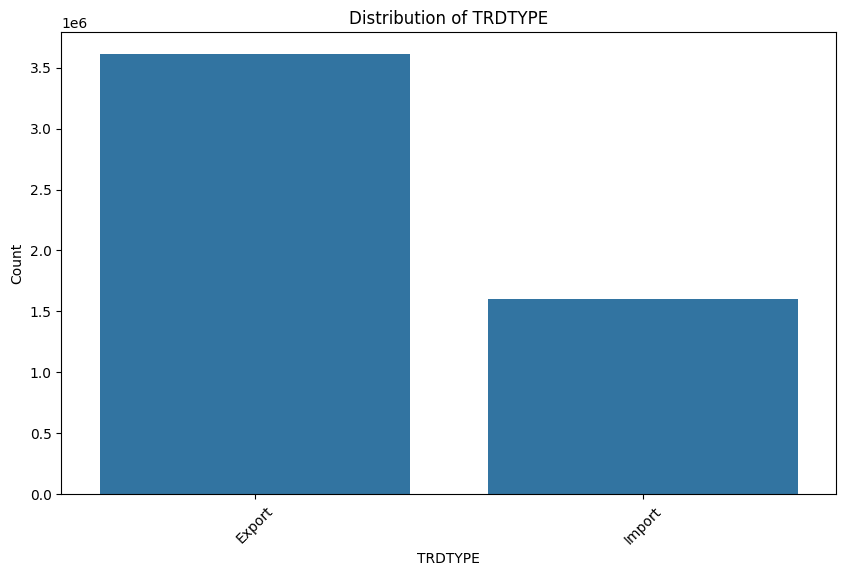

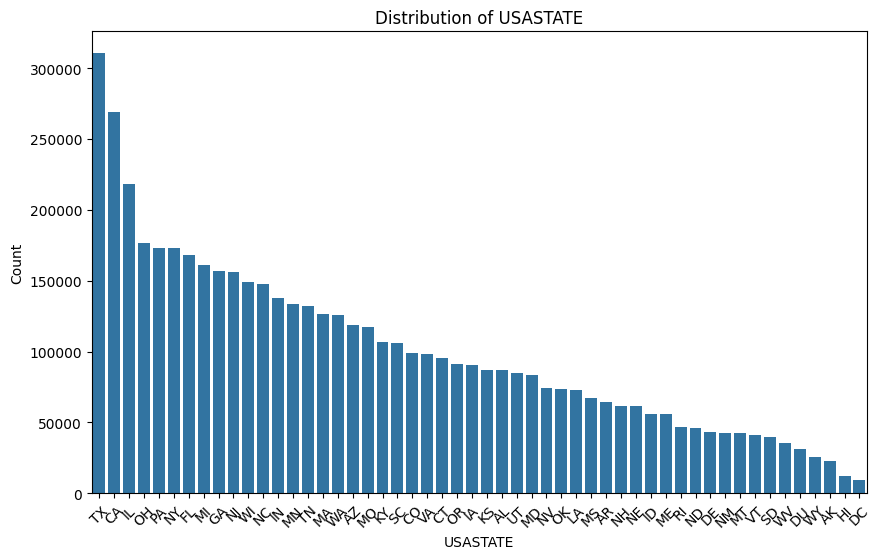

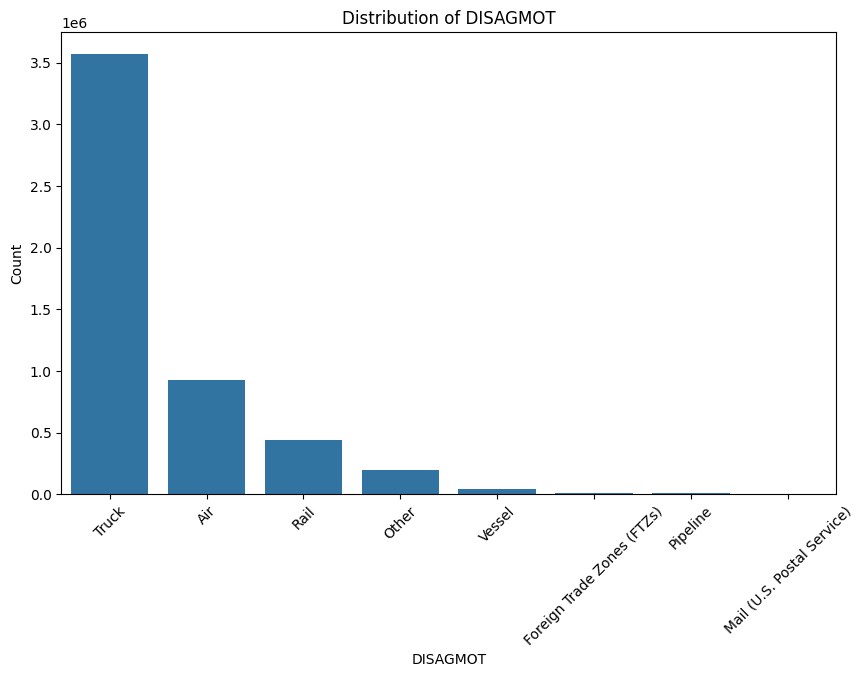

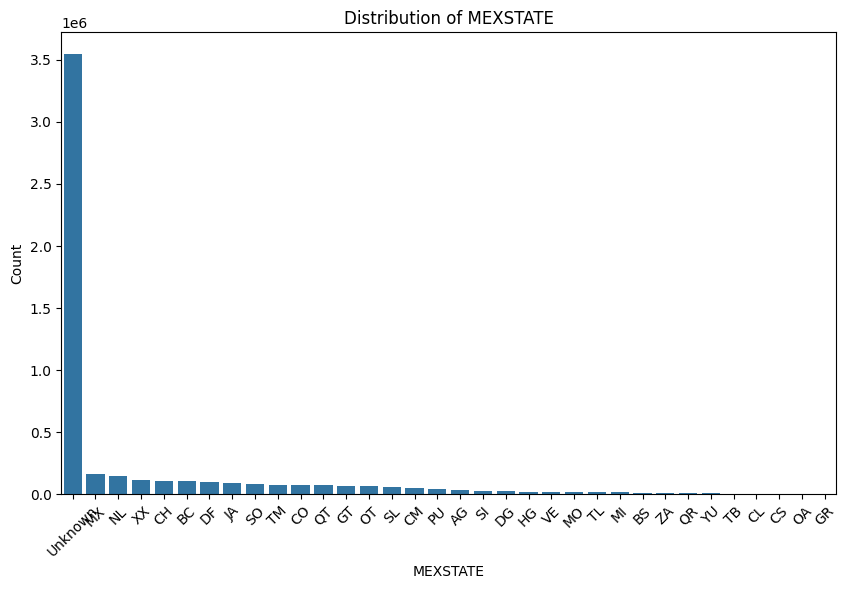

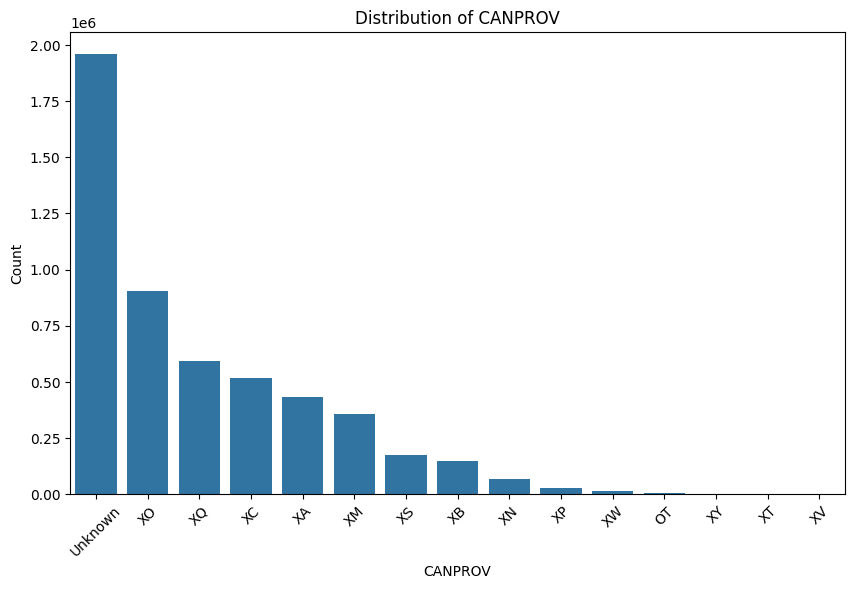

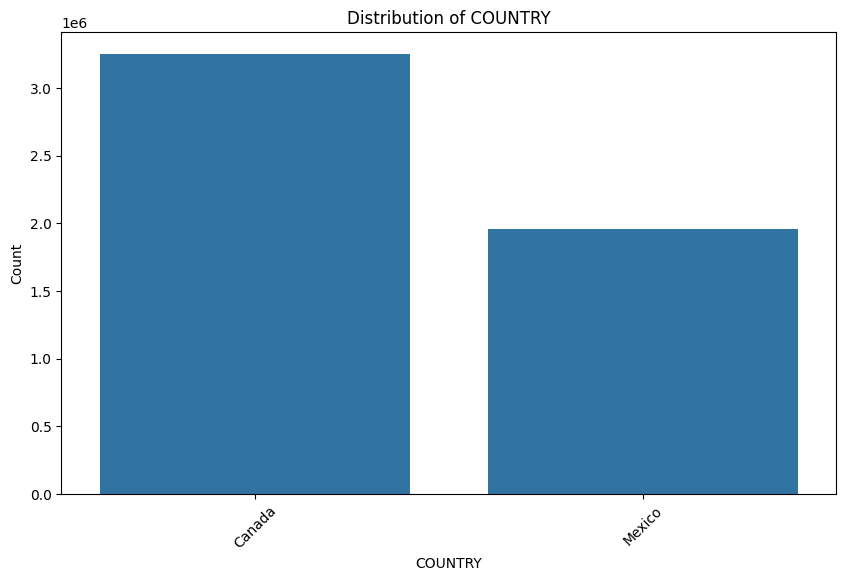

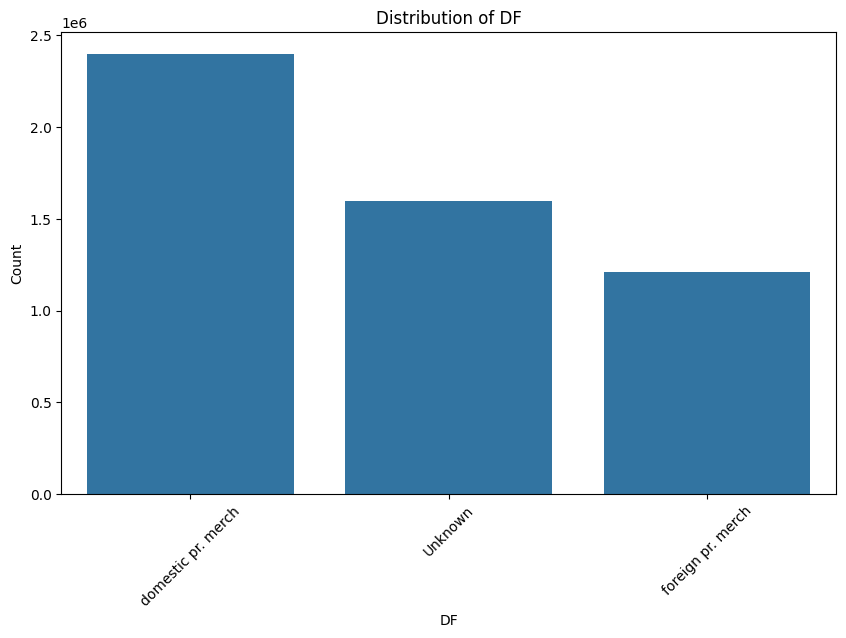

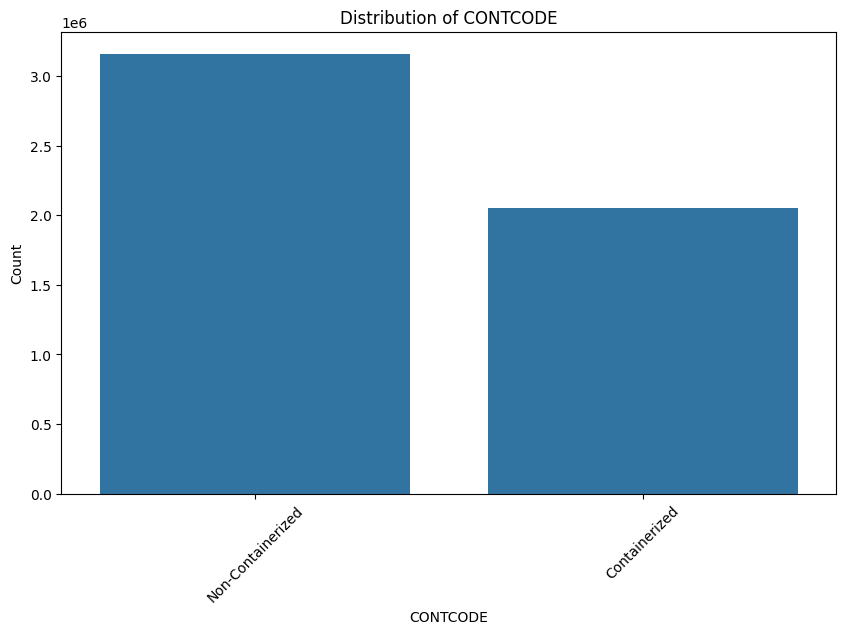

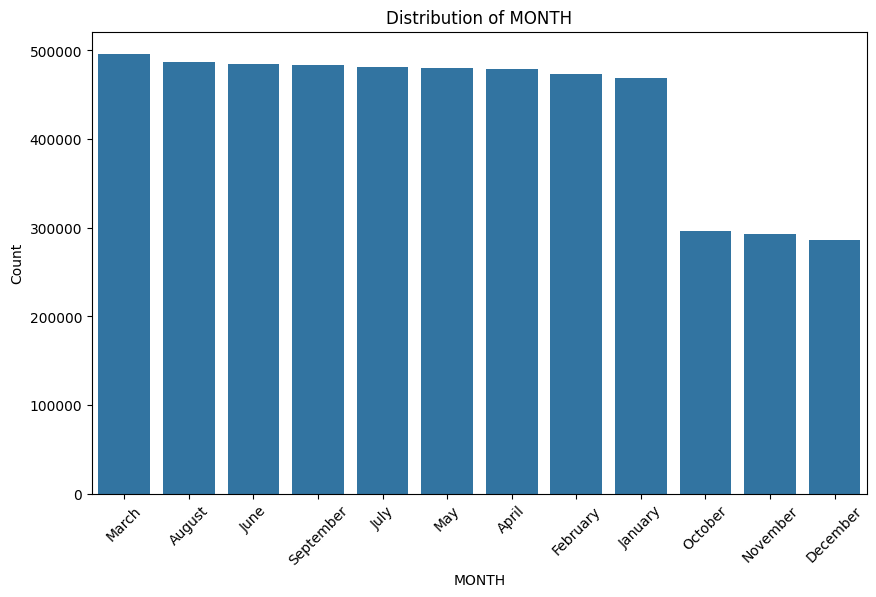

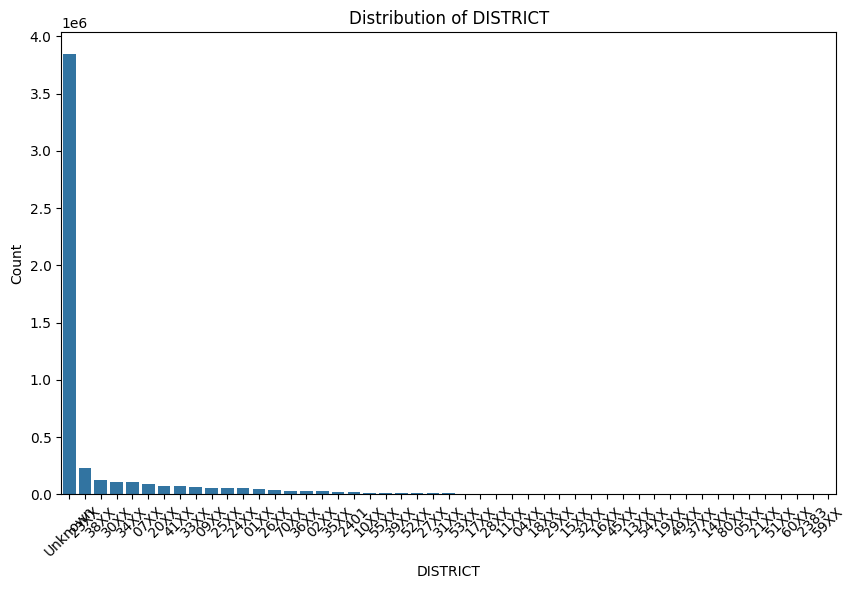

In [9]:
# Plot bar charts for categorical features
categorical_features = dfn.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dfn, x=feature, order=dfn[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

Numerical vs Numerical

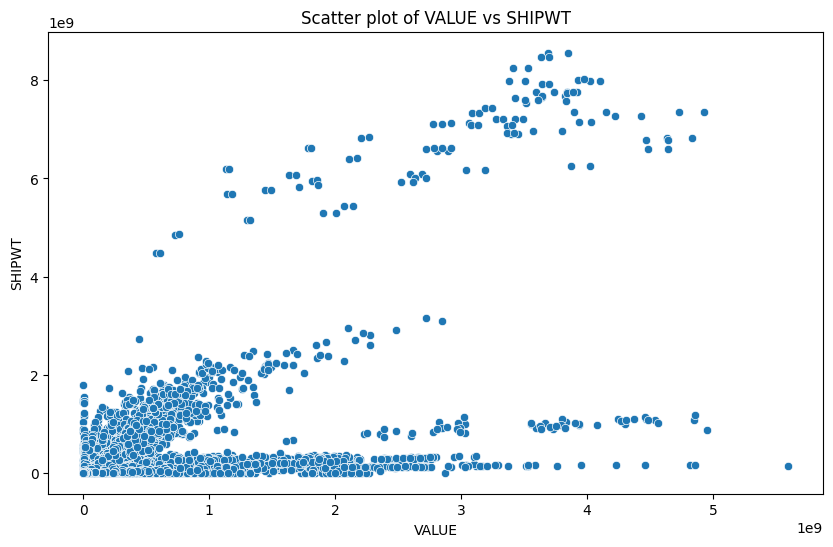

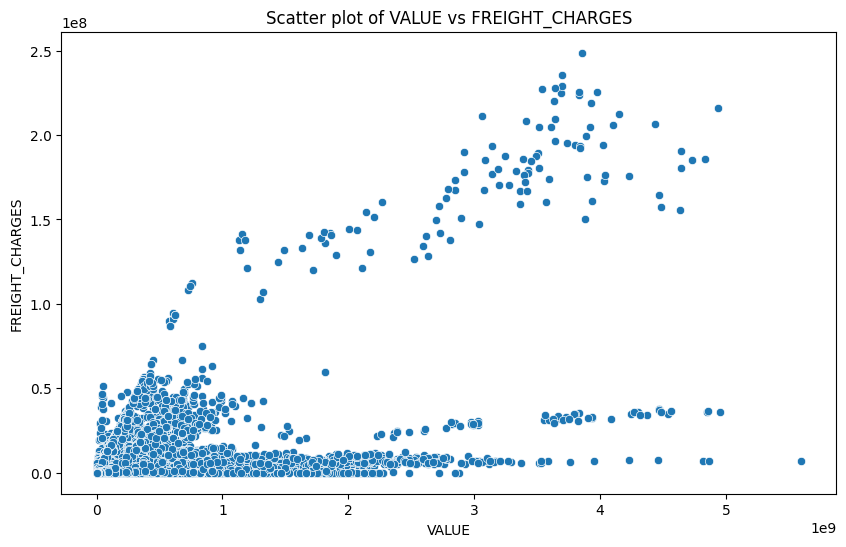

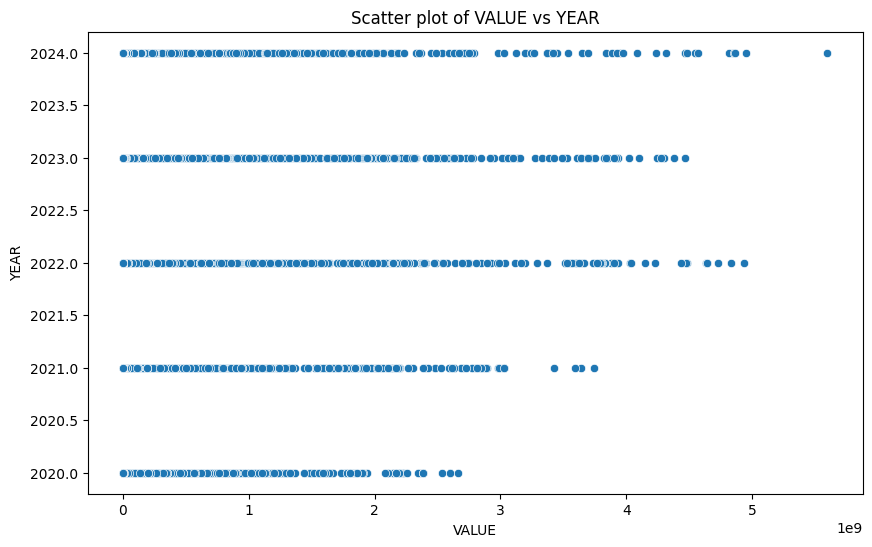

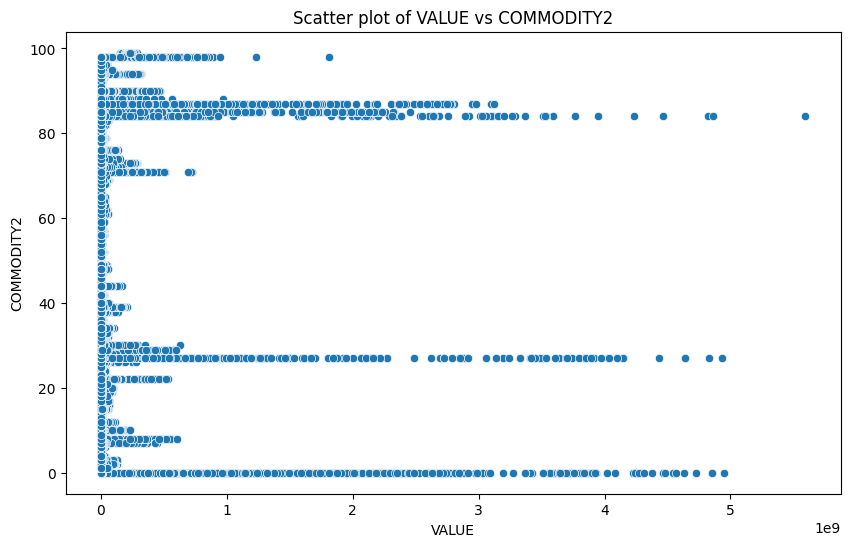

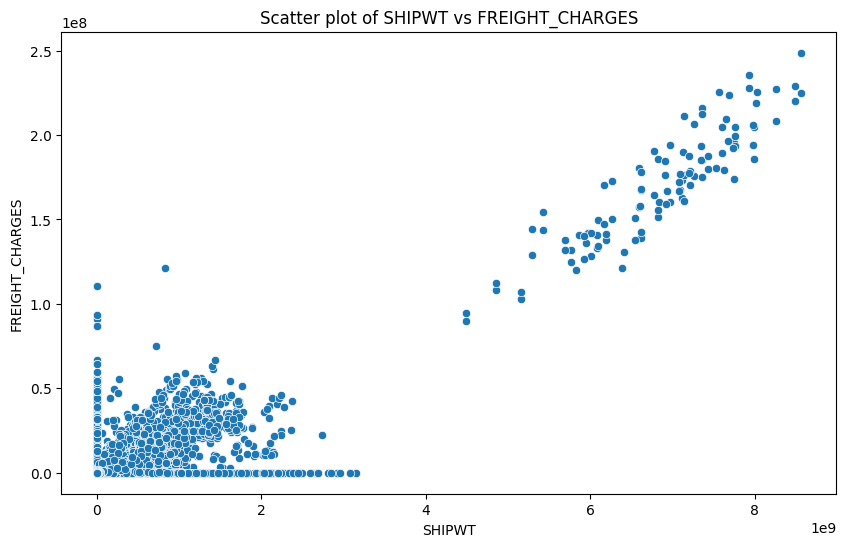

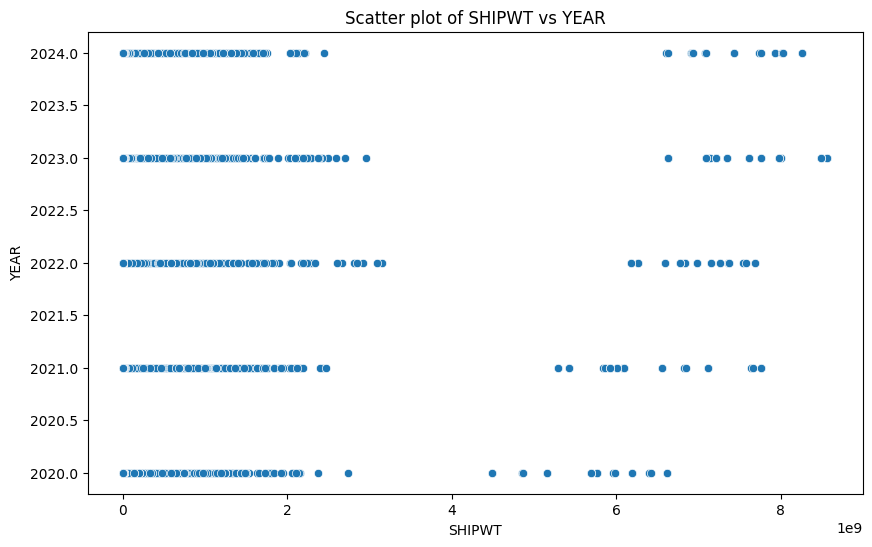

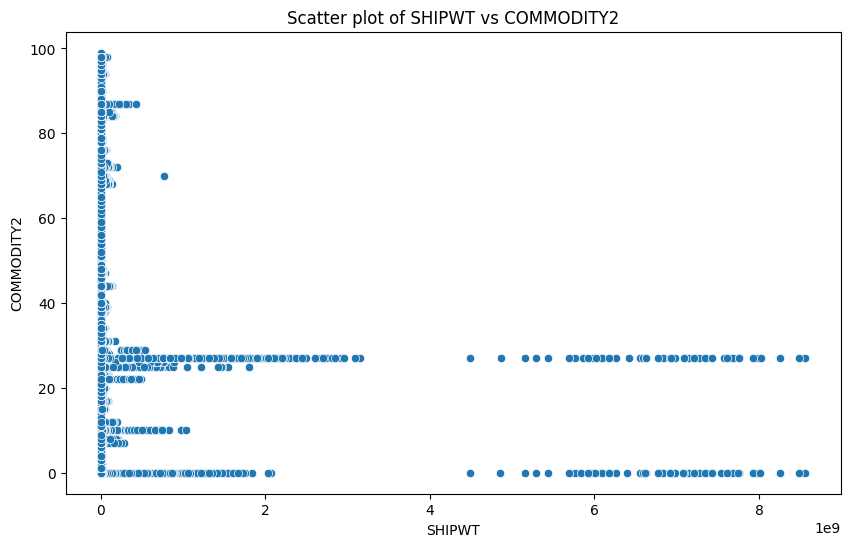

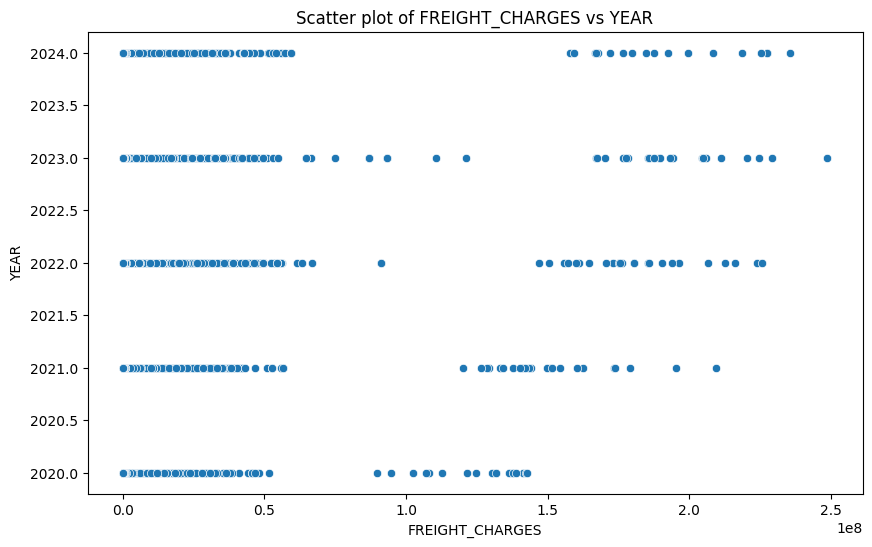

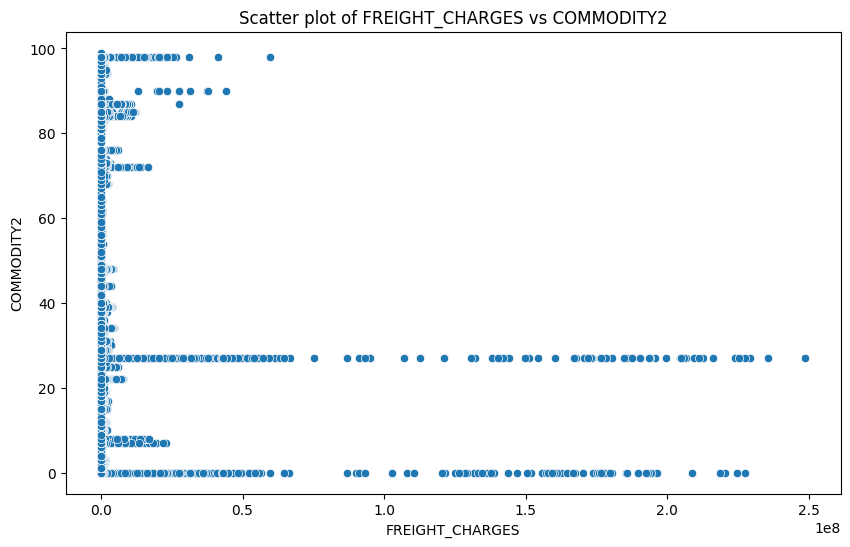

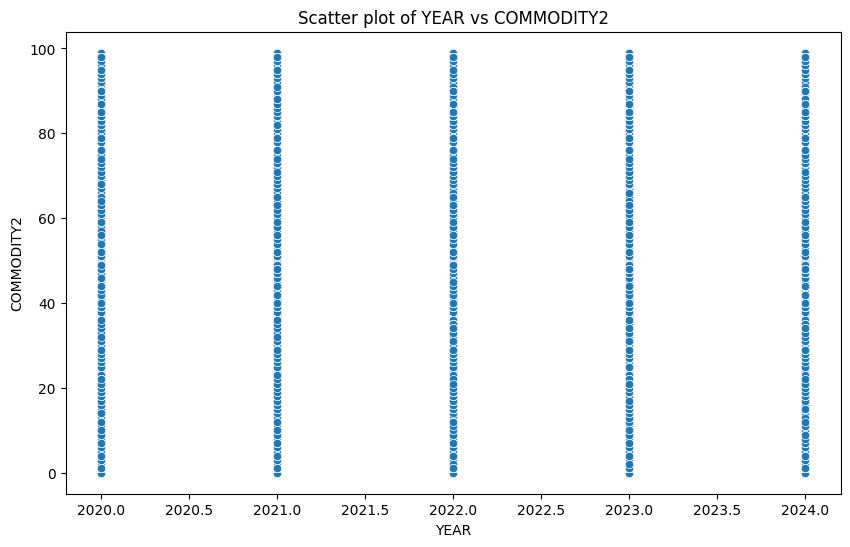

In [10]:
# Plot histograms for numerical features
numerical_features = dfn.select_dtypes(include=['int64']).columns


# Scatter plots for numerical features
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=dfn, x=numerical_features[i], y=numerical_features[j])
        plt.title(f'Scatter plot of {numerical_features[i]} vs {numerical_features[j]}')
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.show()



In [ ]:
# Box plots for numerical vs categorical features
for num_feature in numerical_features:
    for cat_feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=dfn, x=cat_feature, y=num_feature)
        plt.title(f'Box plot of {num_feature} by {cat_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)
        plt.xticks(rotation=45)
        plt.show()


